In [109]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,lfilter,filtfilt,spectrogram
import IPython
from IPython.display import Audio
import ipywidgets

w=wavfile.read(filename=r"c:\Users\Valentin\Documents\wav\v2\Безымянный (3).wav")
w=w[1][:,0]
framerate=44100
duration=w.shape[0]/framerate

def plotspec(signal,ax=plt, **kwargs):
    plt.plot(np.fft.fftfreq(signal.size,d=1/framerate), np.abs(np.fft.fft(signal)),**kwargs)

def showsig(signal):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plotspec(signal)
    plt.xlim([250, 400])
    plt.subplot(122)
    plt.plot(np.linspace(0,len(signal)/framerate, len(signal),endpoint=False),signal)
    plt.show()
    IPython.display.display(Audio(data=signal,rate=framerate))

## Pure tone

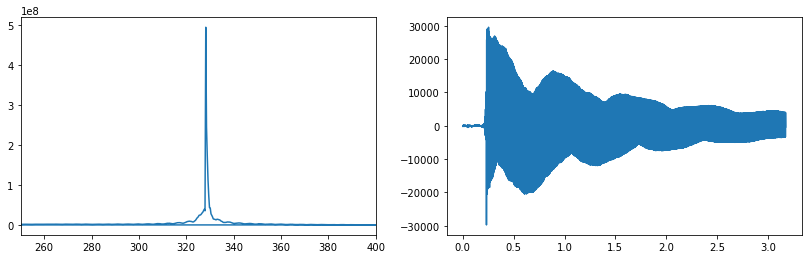

In [110]:
pure=w[128000:268000]
showsig(pure)

## Vibrato

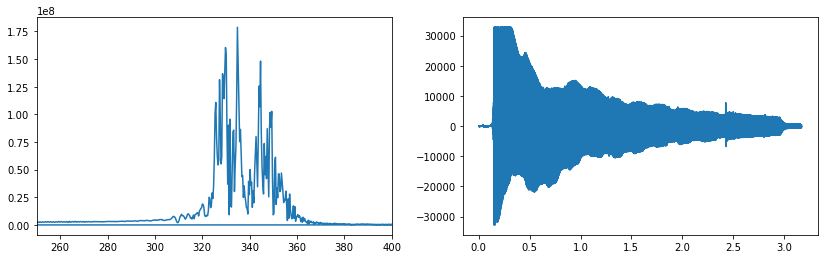

In [111]:
vibrato=w[630000:770000]
showsig(vibrato)

## Comparison

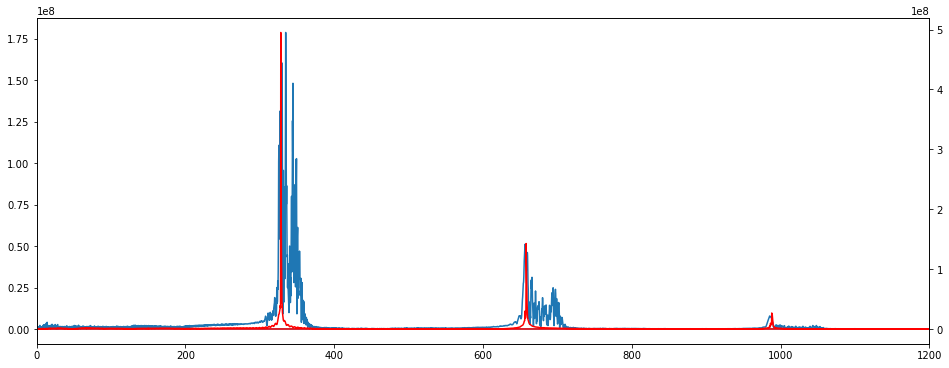

In [112]:
plt.figure(figsize=(16,6))
a=plt.gca()

plotspec(vibrato,a)
a2=a.twinx()
plotspec(pure,a2,c='r')
plt.xlim([0, 1200])

plt.show()

# plotspec(vibrato)
# plotspec(pure)
# plt.show()

## Pure tone spectrogram

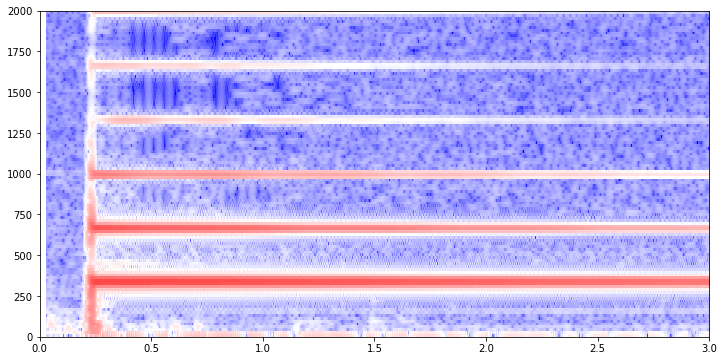

In [116]:
f,t,s_pure=spectrogram(pure,fs=framerate,nperseg=2500, noverlap=2400, window='hann')

# s=(s/s.mean(axis=0))
# s=(s.T/s.mean(axis=1)).T
s_pure_log=np.log(s_pure)

plt.figure(figsize=(12,6))
plt.imshow(s_pure_log, extent=[min(t),max(t),min(f),max(f)],origin='xy',aspect='auto', vmax=35, cmap='seismic')
plt.xlim(0, 3)
plt.ylim(0,2000)
plt.show()

## Vibrato spectrogram

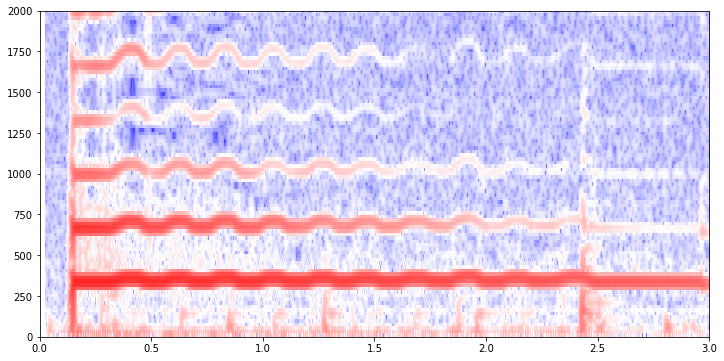

In [117]:
f,t,s_vibr=spectrogram(vibrato,fs=framerate,nperseg=2000, noverlap=1900,window='blackman')

# s=(s/s.mean(axis=0))
# s=(s.T/s.mean(axis=1)).T
s_vibr_log=np.log(s_vibr)

plt.figure(figsize=(12,6))
plt.imshow(s_vibr_log,extent=[min(t),max(t),min(f),max(f)],origin='xy',aspect='auto', vmax=35, cmap='seismic')

plt.xlim(0, 3)
plt.ylim(0, 2000)
plt.show()

In [161]:
def plotspecgram(signal, vmax=35, plt=plt):
    f,t,s=spectrogram(signal,fs=framerate,nperseg=2000, noverlap=1900,window='blackman')

    s_log=np.log(s)

    plt.imshow(s,extent=[min(t),max(t),min(f),max(f)],origin='xy',aspect='auto', vmax=vmax, cmap='seismic')

    plt.set_xlim(0, 3)
    plt.set_ylim(0, 2000)

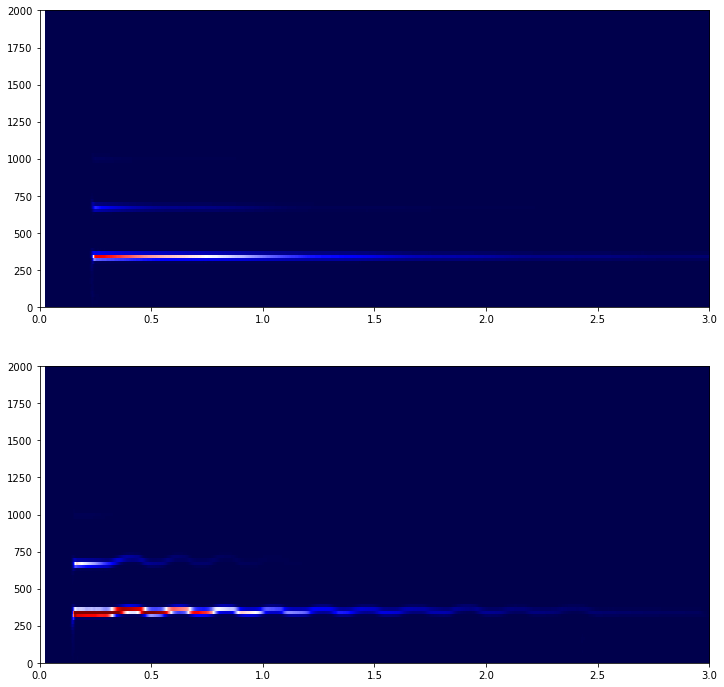

In [173]:
@ipywidgets.interact()
def plot(vmax=(100000,10000000)):
    f,ax=plt.subplots(2,1,figsize=(12,12))
    plotspecgram(pure, vmax, ax[0])
    plotspecgram(vibrato, vmax, ax[1])
    plt.show()